In [1]:
import numpy as np
import pandas as pd
import statsmodels.api
import sklearn
import matplotlib.pyplot as plt

In [2]:
print("SKLearn version is :", sklearn.__version__)

SKLearn version is : 0.21.3


In [50]:
from sklearn.datasets import load_iris
#load dataset from sklearn
iris = load_iris()
#print(type(iris))
#convert to pandas dataset type if needed
if type(iris) is sklearn.utils.Bunch:
    print('Initially loaded iris dataset is of type :', type(iris), "\n\t...converting to pandas dataframe")
    df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
    df_iris['target'] = pd.Series(iris.target)
#get label names
label_names = list(iris.target_names)#; print(label_names)
df_iris.head()#verify conversion success

Initially loaded iris dataset is of type : <class 'sklearn.utils.Bunch'> 
	...converting to pandas dataframe
['setosa', 'versicolor', 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
#begin exploratory analysis
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [33]:
df_iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


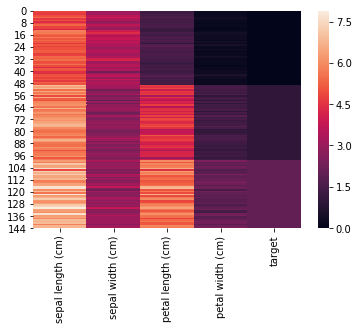

In [38]:
import seaborn as sns
#this plots a heatmap displaying a quick 
#visual guide to the corre
sns.heatmap(df_iris)

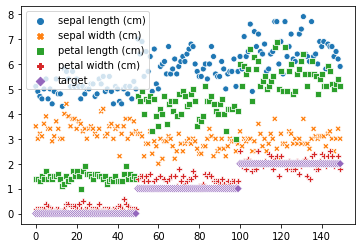

In [45]:
#sns.scatterplot(x="sepal length", y="sepal width", hue='target', data=df_iris)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(hue='target', data=df_iris)

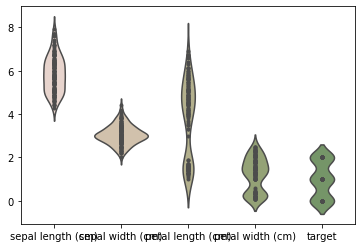

In [50]:
# Use cubehelix to get a custom sequential palette
palette = sns.cubehelix_palette(8, rot=-.75, dark=.3)
# Show each distribution with both violins and points
sns.violinplot(data=df_iris, palette=palette, inner="point")

The above figure shows that while the fields sepal length, sepal width, petal length, petal width are spread out in termsof values, the terget field has three distinct values. Which is what we would expect based on the description of the dataset. This serves as a sanity check that our understanding of the dataset matches the data that we are observing.

In [10]:
from sklearn.model_selection import train_test_split
print('Columns of df_iris :', df_iris.columns.values)
#print(df_iris.shape)
df_features = df_iris.loc[:, ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]# or df_features = df_iris.iloc[:, :4]
df_features.columns = df_iris.columns[:4]
df_labels = df_iris.loc[:, 'target']
#print(type(df_labels))
df_labels.columns = df_iris.columns[-1]
#print(df_features.shape,"",type(df_features) )
print("\nColumns of df_features : ", df_features.columns.values)
random_state = np.random.RandomState(42)#set random seed for replicability
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=random_state)


Columns of df_iris : ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)' 'target']

Columns of df_features :  ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']


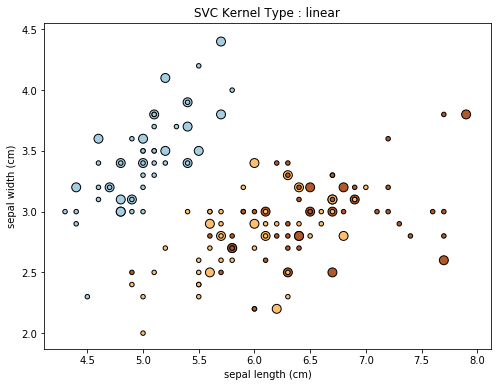

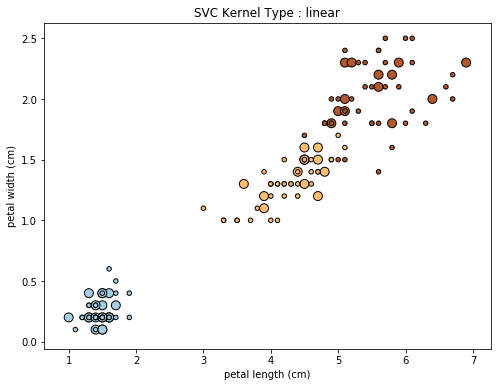

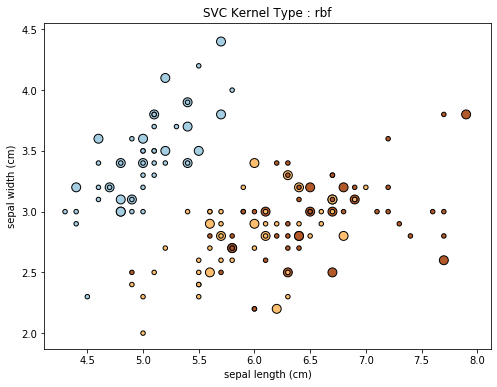

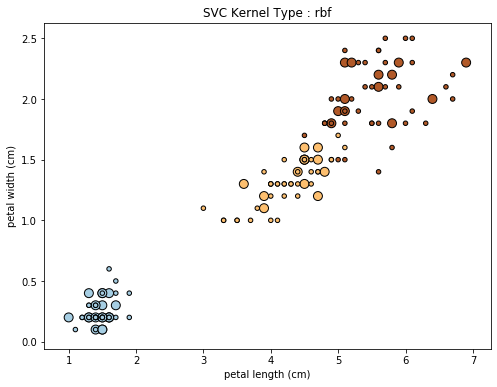

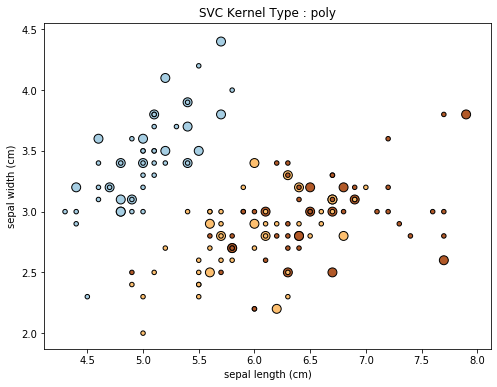

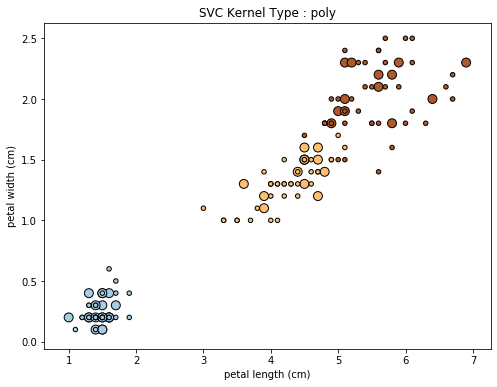

In [11]:
from sklearn import svm
kernels = ['linear', 'rbf', 'poly']
models = []
for kernel in kernels:#fit model for each kernel type of svm
    classifier_model = svm.SVC(kernel=kernel, gamma=10)#iterate through kernels while setting the coefficient/gamma to 10
    classifier_model = classifier_model.fit(X_train, y_train)
    models.append(classifier_model)
    #plot the result
    plt.figure(1, figsize=(8, 6))
    plt.clf()#clear figure
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, zorder=12, cmap=plt.cm.Paired, edgecolor='k', s=20)
    #below is the test data, with s=80 thus the test points are larger in area
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, zorder=10, cmap=plt.cm.Paired, edgecolor='k', s=80)
    plt.xlabel(X_train.columns.values[0])
    plt.ylabel(X_train.columns.values[1])
    plt.title("SVC Kernel Type : "+kernel)
    plt.show()
    plt.figure(1, figsize=(8, 6))
    plt.clf()#clear figure
    plt.scatter(X_train.iloc[:, 2], X_train.iloc[:, 3], c=y_train, zorder=12, cmap=plt.cm.Paired, edgecolor='k', s=20)
    #below is the test data, with s=80 thus the test points are larger in area
    plt.scatter(X_test.iloc[:, 2], X_test.iloc[:, 3], c=y_test, zorder=10, cmap=plt.cm.Paired, edgecolor='k', s=80)
    plt.xlabel(X_train.columns.values[2])
    plt.ylabel(X_train.columns.values[3])
    plt.title("SVC Kernel Type : "+kernel)
    plt.show()

    

In [54]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report

model_preds = []
n_samples, n_features = X_test.shape
n_label_types = y_train.unique()
#print(n_label_types) #array([1, 2, 0], dtype=int64)

#Just for reference
#kernels = ['linear', 'rbf', 'poly']
#label_names = ['setosa', 'versicolor', 'virginica']

for model in models:
    print("\nClassification report for SVC using kernel type :", kernels[models.index(model)].upper())
    y_pred = model.predict(X_test) #(model.decision_function(X_test))#for preict values by class
    model_preds.append(y_pred)
    print(classification_report(y_test, y_pred,target_names=label_names))


#for y_pred in model_preds:
    


Classification report for SVC using kernel type : LINEAR
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Classification report for SVC using kernel type : RBF
              precision    recall  f1-score   support

      setosa       1.00      0.95      0.97        19
  versicolor       1.00      1.00      1.00        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45


Classification report for SVC using kernel type : POLY
              precision    recall  f1-score   support

      setosa  